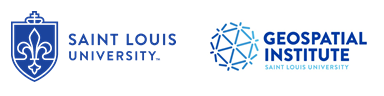

# Lab 03: Tour of Scikit-learn Algorithms Part 1
## GIS 5092: Applied Machine Learning for GIS and Remote Sensing (Fall 2021)
Course Instructor: **Dr. Vasit Sagan** (vasit.sagan@slu.edu)
Teaching Assistant: **Sourav Bhadra** (sourav.bhadra@slu.edu)  
[Join Slack Workspace for this class](https://join.slack.com/t/gis5092-fall21/shared_invite/zt-u9vpmzat-SB5sYNtaPWk3vW_Qbj8QRQ)

## Learning Objectives:

* Prepare training and testing dataset for classification
* Train classifiers using scikit-learn
* Apply a trained classifier to an image

# How to work with this Notebook?
Write your answers in places where you see **YOUR ANSWER HERE** within the **#### ... ####** comments. If there is a variable already declared and assigned a value of **None**, then just replace your code with the assigned **None**. If your answer is code, then use the Code cell, if its text, then use the Text cell. Save a copy of this notebook in your Lab Folder by replacing the STUDENT with your SURNAME in CAPS. Then Upload your deliverables (items listed at the end of this document) in Canvas.

---

In [1]:
# Make project folder as current working directory
import os
print(os.getcwd())

C:\Users\brend_000\Documents\ArcGIS\Projects\GIS 5092\Assignment3_Barth\lab3


---

# Data processing

In [4]:
# Import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rasterio
import geopandas as gpd

ModuleNotFoundError: No module named 'rasterio'

**Task 1** Read image in <code>data</code> folder named (<code>'LC08_L2SP_024033_20201016_20201105_02_T1_SR_Composite.tif'</code>)

In [ ]:
### YOUR ANSWER HERE ###

src = None

########################

**Task 2** Convert rasterio object to np.array

In [ ]:
### YOUR ANSWER HERE ###

img = None

########################

**Task 3** Print the shape of the img

In [ ]:
### YOUR ANSWER HERE ###



########################

**Task 4** Convert the nodata pixels to np.nan  
*Hint:* You may see a ValueError like "cannot convert float NaN to integer". It occurs because the np.nan is conisdered a float datatype, while our "img" variable is an "int" datatype. So convert the "img" datatype from "int" to "float" before converting the nodata pixels to np.nan. You can do that using astype of numpy.

In [ ]:
### YOUR ANSWER HERE ###

# Convert to float
img = None # Hint: use astype('float'). Confused? Google it: How to convert np array datatype from int to float

# Convert nodata to np.nan


########################

**Task 5** Create a function named "band_stat(band)" where the arguments are "band" and "band_name". The "band" is simply a 2D array of a single band and the "band_name" is just the name of the band as a string. The function has to print the maximum, minimum, and mean value of the band along with its name.  
*Hint:* Consider the bands may contain np.nan. So the max, min and mean should  handle the nans.

In [ ]:
def band_stat(band, band_name):

    ### YOUR ANSWER HERE ###

    # Get max, min, mean
    max_val = None
    min_val = None
    mean_val = None

    ########################

    print(f"{band_name}, Max: {max_val:.2f}, Min: {min_val:.2f}, Mean: {mean_val:.2f}")

band_stat(img[0, :, :], 'B1')
band_stat(img[1, :, :], 'B2')
band_stat(img[2, :, :], 'B3')
band_stat(img[3, :, :], 'B4')
band_stat(img[4, :, :], 'B5')
band_stat(img[5, :, :], 'B6')
band_stat(img[6, :, :], 'B7')

**Task 6** Convert all the values of "img" ranging from 0 to 1.  
*Hint:* Divide the "img" variable with some factor. That factor has to be the highest limit of the Landsat 8 OLI precision. To get the highest limit of data range for landsat 8, please search the bit depth of landsat 8 and know the upper limit of that bit depth. Then divide "img" with that value.
[More information about bit-depth of Landsat 8](https://www.usgs.gov/core-science-systems/nli/landsat/landsat-8?qt-science_support_page_related_con=0#qt-science_support_page_related_con)

In [ ]:
### YOUR ANSWER HERE ###

img = None

########################

**Task 7** Print the max, min, and mean of each channel now. The result should look something like this. If it does not match, then your factor may be incorrect.

| Band | Max  | Min  | Mean |
|------|------|------|------|
| B1   | 0.78 | 0.00 | 0.13 |
| B2   | 0.69 | 0.00 | 0.14 |
| B3   | 0.53 | 0.00 | 0.15 |
| B4   | 0.56 | 0.00 | 0.16 |
| B5   | 0.69 | 0.08 | 0.24 |
| B6   | 1.00 | 0.10 | 0.24 |
| B7   | 1.00 | 0.10 | 0.19 |

In [ ]:
band_stat(img[0, :, :], 'B1')
band_stat(img[1, :, :], 'B2')
band_stat(img[2, :, :], 'B3')
band_stat(img[3, :, :], 'B4')
band_stat(img[4, :, :], 'B5')
band_stat(img[5, :, :], 'B6')
band_stat(img[6, :, :], 'B7')

**Task 7** Plot two false color composites from the <code>img</code> variable. Make <code>false1</code> and <code>false2</code>, where the first one is the combination of NIR, Red, and Green band, whereas the last one is the combination of NIR, SWIR2 (Band 7), and Red channels. Remember to do the following:
* Do NOT use any figure size, use the default
* DPI should be 150, not more than that
* Each subplot should have a title with fontsize 6
* Remove the tickmarks from each subplot
* Multiply with a factor to intensify the colors of the image

Your result should be something similar to this:

![img1.PNG](attachment:img1.PNG)

In [ ]:
### YOUR ANSWER HERE ###

false1 = None
false2 = None



plt.show()

########################

**Task 8** Read the training samples shapefile in <code>data</code> folder named <code>'lulc_labels_small.shp'</code>

In [ ]:
### YOUR ANSWER HERE ###

points = None

########################

points

In [ ]:
# Plotting the point shapefile

fig, ax = plt.subplots(1, 1, dpi=150)

points.plot(column='Label', ax=ax, legend=True)

plt.show()

The following function extracts the pixel value(s) from a given point shapefile. Please read through each lines of codes and comments. Try to understand the function so that you can try similar methods for other procedures.

In [ ]:
def extract_pixel_value_from_point(point_shape, image_src, image_np):
    
    """
    Extracts the pixel value(s) from a given point shapefile and
    a numpy geospatial image.
    
    Arguments:
        - point_shape: A geopandas dataframe containing the point
            feature. It must have a UID specified which indicates
            an unique ID.
        - image_src: A rasterio source. The reference system of
            both shapefile and image has to match with each other.
        - image_np: A np.ndarray version of the rasterio image.
            The array should be free from nodata values.
    
    Returns:
        - values_df: A pandas dataframe containing the UID and
            associated pixel value(s).
    """
    
    # Empty dictionary to hold all the pixel values
    values_dict = {}
    
    # Loop through each point feature and populate the dict
    for i, point in enumerate(point_shape['geometry']):
        
        # Get the x and y coordinate
        x = point.xy[0][0]
        y = point.xy[1][0]
        
        # Get the associated row col number
        # based on the coordinate
        row, col = image_src.index(x, y)
        values = image_np[:, row, col]
        
        # Get the UID
        uid = point_shape.iloc[i, 0]
        
        # Populate the dictionary
        values_dict[uid] = values
        
    # Convert the dictionary to a pd dataframe
    values_df = pd.DataFrame(values_dict).T
    # Reset the index of the df
    values_df.reset_index(inplace=True)
    # Change the column names
    values_df.columns = ['UID', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7']
    
    return values_df

# Apply the function
reflectance = extract_pixel_value_from_point(points, src, img)
reflectance

**Important Notes:** If you dont understand some part of the function, then the best thing to go around is to take pices of codes from the function in a seperate cell and examine the variables/proces you dont understand by printing their output. This is a great way to get around codes from other authors.

Add the label information from the <code>points</code> dataframe to the <code>reflectance</code> dataframe based on the UID. [Check out this website to learn more about joining dataframes](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)

In [ ]:
# Joining
data = reflectance.join(points, on='UID', rsuffix='_')
data

**Task 9** Create a bar plot showing the number of samples per label from the <code>data</code> dataframe.  
*Hint:* use <code>value_counts</code> from <code>pandas</code> and <code>plt.bar</code> from <code>matplotlib</code>

In [ ]:
### YOUR ANSWER HERE ###

counts = None


plt.show()

########################

We need to shuffle our data before splitting the dataset into train and test set. Lets shuffle and split.

In [ ]:
from sklearn.utils import shuffle
data = shuffle(data)

# We dont need all the columns, lets just keep the ones that we need
data = data[['Label', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7']]
data

Now let's encode the texts in <code>Label</code> column into some numeric values. For example, we can convert Water to 1, Wetland to 2, Developed to 3, Forest to 4, and Agriculture to 5.

In [ ]:
# Create a clumn named 'Label_int' which has only 0 as values
data['Label_int'] = 0
data

In [ ]:
# Perform the following operation
for i in range(data.shape[0]):
    label_txt = data.iloc[i, 0]
    
    if label_txt=='Water':
        data.iloc[i, -1] = 1
    elif label_txt=='Wetland':
        data.iloc[i, -1] = 2
    elif label_txt=='Developed':
        data.iloc[i, -1] = 3
    elif label_txt=='Forest':
        data.iloc[i, -1] = 4
    elif label_txt=='Agriculture':
        data.iloc[i, -1] = 5
        
data

In [ ]:
# Create train and test set
train_size = int(data.shape[0] * 0.7) # Getting the train size based on 70/30 split ratio

X_train = data.iloc[:train_size, 1:-1]
y_train = data.iloc[:train_size, -1]
X_test = data.iloc[train_size:, 1:-1]
y_test = data.iloc[train_size:, -1]

In [ ]:
# Now check their shapes
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

So we have a train set, where there are 700 samples and 7 features (independent variables). Also we have corresponding target labels. Then we have a test set where we have 300 samples and also that same 7 features with corresponding target labels. Now let's move on to the modeling part.

# Model training

**Task 10** Train following models with different hyperparameters with the train set (<code>X_train</code> and <code>y_train</code>) and get the overall accuracy of each classifier with the test set (<code>X_test</code> and <code>y_test</code>). Follow along the code cells to proceed with step by step approach. 

Go to the sklearn links associated below to know about how to import them or work with them.
1. [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
2. [Decision Trees](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
3. [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
4. [Support Vector Machine](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

* For each classifier, use at least two different hyperparameters. Hyperparameters are specific parameters for different model. Each model assume specific functions/distributions in data which result in very different model. So we need to test different hyperparameter for every model and apply to our data. Now, not all the hyperparameters are always important. We will know throughout the course, which hyperparameter are the most important ones for different models, but for this lab, we will test some specific hyperparameters. In a word document, create a table which may look like this:


| Model Name             | Hyperparameter | Hyperparamter values | Accuracy |
|------------------------|----------------|----------------------|----------|
| Logistic Regression    | penalty        | l2                   | 0.71     |
|------------------------|----------------|----------------------|----------|
| Decision Trees         | criterion      | gini                 | 0.72     |
|                        |                | entropy              | 0.70     |
|------------------------|----------------|----------------------|----------|
| Random Forests         | n_estimators   | 100                  | 0.78     |
|                        |                | 500                  | 0.79     |
|                        |                | 1000                 | 0.78     |
|------------------------|----------------|----------------------|----------|
| Support Vector Machine | kernel         | rbf                  | 0.74     |
|                        |                | linear               | 0.71     |

In [ ]:
## Import modules

# Import the logistic regression classifier from sklearn
from sklearn.linear_model import LogisticRegression

# Import the decision tree classifier from sklearn
from sklearn.tree import DecisionTreeClassifier

# Import the random forest classifier from sklearn
from sklearn.ensemble import RandomForestClassifier

# Import the support vector machine classifier from sklearn
from sklearn.svm import SVC

In [ ]:
# Conduct the logistic regression for different hyperparameters and
# calculate scores for each combination and note the value in the table

lrc = None

In [ ]:
# Conduct the decision tree for different hyperparameters and
# calculate scores for each combination and note the value in the table

dtc = None

In [ ]:
# Conduct the random forest for different hyperparameters and
# calculate scores for each combination and note the value in the table

rfc = None

In [ ]:
# Conduct the support vector machine for different hyperparameters and
# calculate scores for each combination and note the value in the table

svc = None

# Applying model to image

Now we have a model that takes an input of 7 bands from Landsat image and shoots out the predicted class based on the reflectance values. We can now apply that model to an image to get a Land Use land Cover map from it. We will try that using a smaller subset of the image for faster processing. The smaller image name is <code>'LC08_L2SP_024033_20201016_20201105_02_T1_SR_Composite_Small.tif'</code> in the same <code>data</code> folder.

In [ ]:
# Read the small image as rasterio src
src_small = rasterio.open('.\data\LC08_L2SP_024033_20201016_20201105_02_T1_SR_Composite_Small.tif')

# Convert the image into np array
img_small = src_small.read()

# Since we had previously converted the image values form 0 to 1, 
# we need to do the same for this image
# Divide the whole image by the same value you used to divide the 
# original training data
img_small = img_small / 65536

# Print its shape
print(img_small.shape)

Now pick the best classifier that yielded the highest accuracy score for the test set. We will now use that model to predict the LULC for the whole image. To do that, we need to be little strategic. Because any **trained model from sklearn expects the data in a form of (<code>n_samples, n_features</code>), and our img data is a 3D format array where the shape is like this: <code>(n_channels, n_rows, n_columns)</code>.** Here the n_channels is the feature. So we need to first **flatten the rows and columsn into a single dimension**.

In [ ]:
# First we need to move the n_channel dimension to the end
# because sklearn expects the data in a way where the n_features
# is in the last dimension
img_channel_last = np.moveaxis(img_small, 0, 2)

# Now check the shape
print(img_channel_last.shape)

In [ ]:
# See that the n_channels (which is 7) is in the last position

# Now reshape the img from 3D to 2d
img_reshaped = img_channel_last.reshape(-1, 7)
# -1 indicates that combine the rest of dimension altogether. Its equivalent to
# img.reshape(7, 7741*7611) but the -1 handles that on its own.
# Check its shape
print(img_reshaped.shape)

So we have now 501*501=251001 samples and 7 features. Now the dataset looks like an array which can be understood by sklearn estimators

In [ ]:
# Now let's predict all the values using the predict method
# Remember the resulting array would be a 1D array
lulc_1d = None

# Check it's shape
print(lulc_1d.shape)

In [ ]:
# We have to convert the 1d predicted lulc values to a 2d array to
# get that as an image. Reshape it back to its original shape
lulc_2d = lulc_1d.reshape(img_small.shape[1], img_small.shape[2])
print(lulc_2d.shape)

In [ ]:
# Plot the image
plt.figure(dpi=150)
plt.imshow(lulc_2d)
plt.show()

Great! Now save the image as a GeoTIFF file so that we can open that in ArcGIS or ENVI and make a nice map with legends, scale bar, north arrow etc. However, currently the <code>lulc_2d</code> is just a np array. To save it as a geospatial raster data, we need to get help from rasterio. [Please refer here to learn more about how to write raster datasets using rasterio](https://rasterio.readthedocs.io/en/latest/topics/writing.html).

In [ ]:
# First get the profile information of the main raster img_small
profile = src_small.profile
print(profile)

In [ ]:
# Its a dictionary with all the necessary geospatial information. For LULC data, the only thing changed here is the 'count'
# Because, previously the image had 7 bands, now the LULC has only 1 band. Update that
profile.update({'count': 1})

print(profile)

In [ ]:
# Now save it in the lab3 folder
with rasterio.open('.\data\LULC1.tif', 'w', **profile) as dst:
    dst.write(lulc_2d.astype(rasterio.uint16), 1)

# Deliverables from Part 1

* The completed notebook named <code>a3_tour_of_scikitlearn_algorithms_Part1_STUDENT.ipynb</code> (change the STUDENT with your surname or SLU net id)
* A Microsoft Word Document (.docx) file where you have a table with different models, hyperparameters and test scores (The template of the table is given in **Task 10**)
* A JPG map of LULC1.tif created in ArcGIS Desktop or ArcGIS Pro (or any geospatial software of your liking), where you provide map title, legends, north arrow, scale bar etc.